In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px





#Loading dtaframe previously uploaded on Github

url = 'https://raw.githubusercontent.com/Giacomo-Cammeo/workdata/d172b8ae14dd028e5e1a7e375f5a4d3f47a0bf76/ds_salaries.csv'

df = pd.read_csv(url)


# Eda

In [76]:
#Print the first rows of our dataframe
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [77]:
#Get the shape of our dataframe
df.shape

(3755, 11)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [79]:
#Check for null values in our observations
#df.isna().sum()

In [80]:
#Count the observations per column

df['work_year'].value_counts()
#df["experience_level"].value_counts()
#df["employment_type"].value_counts()
#df["job_title"].value_counts()
#df["salary "].value_counts()
#df["salary_currency"].value_counts()
#df["salary_in_usd"].value_counts()
#df["employee_residence  "].value_counts()
#df["remote_ratio"].value_counts()
#df["company_location"].value_counts()
#df["company_size"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

<ipython-input-81-894718e57b7c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



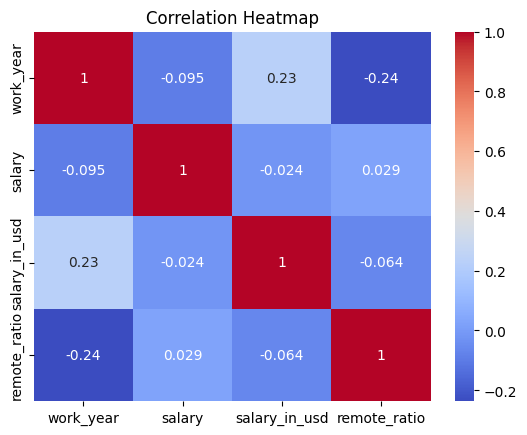

In [81]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

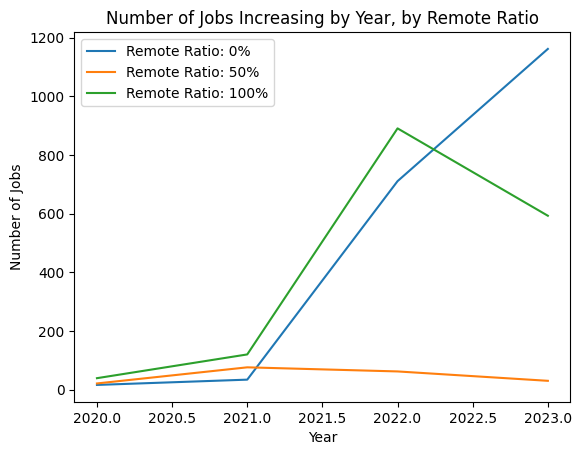

In [82]:
# Group the DataFrame by year and remote ratio, and count the number of jobs in each group
grouped_df = df.groupby(['work_year', 'remote_ratio']).count()['job_title'].reset_index()

# Create a line plot with three different lines representing the number of jobs with remote ratios of 0%, 50%, and 100%
plt.plot(grouped_df[grouped_df['remote_ratio'] == 0]['work_year'], grouped_df[grouped_df['remote_ratio'] == 0]['job_title'], label='Remote Ratio: 0%')
plt.plot(grouped_df[grouped_df['remote_ratio'] == 50]['work_year'], grouped_df[grouped_df['remote_ratio'] == 50]['job_title'], label='Remote Ratio: 50%')
plt.plot(grouped_df[grouped_df['remote_ratio'] == 100]['work_year'], grouped_df[grouped_df['remote_ratio'] == 100]['job_title'], label='Remote Ratio: 100%')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs Increasing by Year, by Remote Ratio')

# Add a legend to the plot
plt.legend()

plt.show()

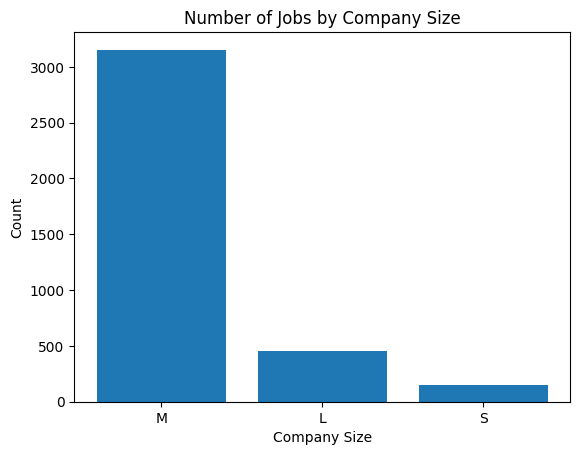

In [83]:
# Count the number of jobs for each company size
counts = df['company_size'].value_counts()

# Plot the histogram
plt.bar(counts.index, counts.values)
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Number of Jobs by Company Size')
plt.show()

In [84]:
#Get the contingency table for company_size and remote ratio

cont_table = pd.crosstab(df['company_size'], df['remote_ratio'])
cont_table

remote_ratio,0,50,100
company_size,,,
L,124,110,220
M,1774,47,1332
S,25,32,91


In [85]:
#Group the DataFrame by the employment_type and remote_ratio columns, and count the number of jobs in each group
grouped_df = df.groupby(['employment_type', 'remote_ratio']).count()['job_title'].reset_index()

print(grouped_df)

  employment_type  remote_ratio  job_title
0              CT            50          1
1              CT           100          9
2              FL             0          1
3              FL            50          4
4              FL           100          5
5              FT             0       1922
6              FT            50        176
7              FT           100       1620
8              PT            50          8
9              PT           100          9


In [86]:
# Group the data by job title and calculate the mean salary for each group
mean_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean()

# Sort the mean salary values in descending order and take the top ten job titles
top_ten_titles = mean_salary_by_title.sort_values(ascending=False).head(10)

# Print the top ten job titles and their mean salaries
#print(top_ten_titles)

In [87]:
#Get the avg salary by company size

average_salary_by_size = df.groupby('company_size')['salary_in_usd'].mean()

# Print the average salary by company size
print(average_salary_by_size)

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [88]:
# Group the data by company size and experience level, and calculate the mean salary for each group
grouped = df.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean()

# Print the result
print(grouped)

company_size  experience_level
L             EN                   72896.810000
              EX                  165363.153846
              MI                   89135.731343
              SE                  156159.690821
M             EN                   87416.456140
              EX                  198857.284211
              MI                  111586.421900
              SE                  153643.334069
S             EN                   59120.734694
              EX                  196827.166667
              MI                   58080.500000
              SE                  106875.465116
Name: salary_in_usd, dtype: float64


In [89]:
# Filter the rows where the company_location is different from the employee_residence
filter_country_df = df[df['company_location'] != df['employee_residence']]

# Print the filtered DataFrame
filter_country_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
81,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,PT,100,US,M
82,2023,MI,FT,Applied Machine Learning Engineer,65000,EUR,69751,IN,100,DE,S
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
218,2023,SE,FT,Applied Data Scientist,100000,AUD,68318,AU,100,FI,M
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
...,...,...,...,...,...,...,...,...,...,...,...
3729,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3731,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


In [90]:
#Install package for geographical analysis and exploration

!pip install pycountry-convert

import pycountry_convert as pc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
#Define the function to assign country and continent from the employee_residence column 

def get_country_continent(employee_residence):
    # convert country code to full country name
    country_name = pc.country_alpha2_to_country_name(employee_residence)

    # get continent name
    continent_code = pc.country_alpha2_to_continent_code(employee_residence)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)

    return country_name, continent_name


In [92]:
df[['Country', 'Continent']] = df['employee_residence'].apply(lambda x: pd.Series(get_country_continent(x)))


In [93]:
import pycountry

# Define mapping dictionary
country_mapping = {}
for country in pycountry.countries:
    country_mapping[country.name] = country.alpha_3

# Map company_location values to standard country names
df['country_code'] = df['Country'].map(country_mapping)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Continent,country_code
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain,Europe,ESP
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States,North America,USA
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States,North America,USA
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada,North America,CAN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada,North America,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,United States,North America,USA
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,United States,North America,USA
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,United States,North America,USA
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,United States,North America,USA


In [94]:
# Group the DataFrame by country and calculate the mean salary
mean_salary_by_country = df.groupby('country_code')['salary_in_usd'].mean().reset_index()

# Plot the world map
fig = px.choropleth(mean_salary_by_country, locations='country_code', color='salary_in_usd',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection='natural earth')
fig.show()

In [95]:
# Group by country and calculate the mean salary
country_salaries = df.groupby('Country')['salary_in_usd'].mean().reset_index()

# Create bar chart
fig = px.bar(country_salaries, x='Country', y='salary_in_usd', 
             title='Average Salary in USD by Country')

# Show plot
fig.show()


In [96]:
# Filter the DataFrame to get only the observations where country is Israel
israel_df = df[df['Country'] == 'Israel']

# Print the Israel DataFrame
israel_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Continent,country_code
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L,Israel,Asia,ISR


In [97]:
# Count the number of observations for each country
cont_counts = df['Continent'].value_counts()

# Print the counts
print(cont_counts.head(25))

North America    3107
Europe            464
Asia              120
South America      33
Africa             17
Oceania            14
Name: Continent, dtype: int64


In [98]:
# Group by country and calculate the mean salary
country_salaries = df.groupby('Continent')['salary_in_usd'].mean().reset_index()

# Create bar chart
fig = px.bar(country_salaries, x='Continent', y='salary_in_usd', 
             title='Average Salary in USD by Continent')

# Show plot
fig.show()

# **Data manipulation**

In [99]:
# Keep only rows with continent North America or Europe
df = df[df['Continent'].isin(['North America', 'Europe'])]

In [100]:
#Remove observations different from Full Time contract
df = df[df['employment_type'] == 'FT']
df = df.drop('employment_type', axis=1)
df


,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Continent,country_code
0,2023,SE,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain,Europe,ESP
3,2023,SE,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada,North America,CAN
4,2023,SE,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada,North America,CAN
5,2023,SE,Applied Scientist,222200,USD,222200,US,0,US,L,United States,North America,USA
6,2023,SE,Applied Scientist,136000,USD,136000,US,0,US,L,United States,North America,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,2021,MI,Data Engineer,24000,EUR,28369,MT,50,MT,L,Malta,Europe,MLT
3749,2021,SE,Data Specialist,165000,USD,165000,US,100,US,L,United States,North America,USA
3750,2020,SE,Data Scientist,412000,USD,412000,US,100,US,L,United States,North America,USA
3751,2021,MI,Principal Data Scientist,151000,USD,151000,US,100,US,L,United States,North America,USA


In [101]:
#Remove slary in local currency and currency name as using salary_in_usd for our models
df = df.drop('salary', axis=1)
df = df.drop('salary_currency', axis=1)
df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Continent,country_code
0,2023,SE,Principal Data Scientist,85847,ES,100,ES,L,Spain,Europe,ESP
3,2023,SE,Data Scientist,175000,CA,100,CA,M,Canada,North America,CAN
4,2023,SE,Data Scientist,120000,CA,100,CA,M,Canada,North America,CAN
5,2023,SE,Applied Scientist,222200,US,0,US,L,United States,North America,USA
6,2023,SE,Applied Scientist,136000,US,0,US,L,United States,North America,USA


In [102]:
#Print number of observations per job_title
job_title_counts = df['job_title'].value_counts()
print(job_title_counts)


Data Engineer                        1021
Data Scientist                        799
Data Analyst                          587
Machine Learning Engineer             277
Data Architect                        101
                                     ... 
Manager Data Management                 1
Azure Data Engineer                     1
Applied Machine Learning Engineer       1
Data DevOps Engineer                    1
Finance Data Analyst                    1
Name: job_title, Length: 82, dtype: int64


In [103]:
# replace 'ML' with 'Machine Learning' in the job_title column
df['job_title'] = df['job_title'].replace({'ML Engineer': 'Machine Learning Engineer'})

# display the first few rows of the updated dataframe
df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Continent,country_code
0,2023,SE,Principal Data Scientist,85847,ES,100,ES,L,Spain,Europe,ESP
3,2023,SE,Data Scientist,175000,CA,100,CA,M,Canada,North America,CAN
4,2023,SE,Data Scientist,120000,CA,100,CA,M,Canada,North America,CAN
5,2023,SE,Applied Scientist,222200,US,0,US,L,United States,North America,USA
6,2023,SE,Applied Scientist,136000,US,0,US,L,United States,North America,USA


In [104]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

df['job_title_category'] = df['job_title']


# Define the four main job title categories
categories = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer']

# Create a new column to store the main job title category
df['main_job_title_category'] = 'Other'

# Split the job title column into individual words and remove stop words and punctuation marks
stop_words = set(stopwords.words('english'))
df['job_title_words'] = df['job_title'].str.lower().str.split()
df['job_title_words'] = df['job_title_words'].apply(lambda words: [word for word in words if word not in stop_words])
df['job_title_words'] = df['job_title_words'].apply(lambda words: [word for word in words if word.isalpha()])

# Prepare the training data
training_data = []
for category in categories:
    job_titles = df[df['job_title_category'] == category]['job_title_words'].tolist()
    job_titles = [' '.join(title) for title in job_titles]
    labels = [category] * len(job_titles)
    training_data.extend(list(zip(job_titles, labels)))

# Shuffle the training data and split it into training and validation sets
np.random.seed(42)
np.random.shuffle(training_data)
split_index = int(0.8 * len(training_data))
train_data = training_data[:split_index]
val_data = training_data[split_index:]

# Train a text classification model
vectorizer = CountVectorizer()
clf = MultinomialNB()
train_x = vectorizer.fit_transform([x[0] for x in train_data])
train_y = [x[1] for x in train_data]
clf.fit(train_x, train_y)

# Evaluate the model
val_x = vectorizer.transform([x[0] for x in val_data])
val_y = [x[1] for x in val_data]
val_y_pred = clf.predict(val_x)
print(classification_report(val_y, val_y_pred))

# Apply the model to the entire dataset
test_x = vectorizer.transform([' '.join(words) for words in df['job_title_words'].tolist()])
test_y_pred = clf.predict(test_x)
df['main_job_title_category'] = test_y_pred

# Review and refine the results
print(df['main_job_title_category'].value_counts())


                           precision    recall  f1-score   support

             Data Analyst       1.00      1.00      1.00       105
            Data Engineer       1.00      1.00      1.00       196
           Data Scientist       1.00      1.00      1.00       172
Machine Learning Engineer       1.00      1.00      1.00        70

                 accuracy                           1.00       543
                macro avg       1.00      1.00      1.00       543
             weighted avg       1.00      1.00      1.00       543

Data Engineer                1561
Data Scientist                968
Data Analyst                  637
Machine Learning Engineer     381
Name: main_job_title_category, dtype: int64


In [106]:
#Dropping useless columns for our models

df = df.drop('job_title', axis=1)
df = df.drop('employee_residence', axis=1)
df = df.drop('company_location', axis=1)
df = df.drop('job_title_category', axis=1)
df = df.drop('job_title_words', axis=1)


In [107]:
#Final dataframe overview 

df.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,Country,Continent,country_code,main_job_title_category
0,2023,SE,85847,100,L,Spain,Europe,ESP,Data Scientist
3,2023,SE,175000,100,M,Canada,North America,CAN,Data Scientist
4,2023,SE,120000,100,M,Canada,North America,CAN,Data Scientist
5,2023,SE,222200,0,L,United States,North America,USA,Data Scientist
6,2023,SE,136000,0,L,United States,North America,USA,Data Scientist


In [108]:
#Get the final dataframe's shape

df.shape

(3547, 9)

In [109]:
#Save final dataframe

df.to_csv('pricesforsml.csv', index=False)

# Regression

**Encoding to prepare for regression tasks**

In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# load the dataset
df_regression = df

# encoding all columns where dtype = object using LabelEncoder
le = LabelEncoder()

# iterate over each column in the dataframe
for col in df_regression.columns.to_list():

    # check if the column datatype is object (categorical)  
    if df_regression[col].dtype == 'object':

      # apply label encoding to transform categorical values into numerical labels
        df_regression[col] = le.fit_transform(df_regression[col])

        
# train, test, split

# separate the features (independent variables) and the target variable
features = df.drop("salary_in_usd", axis=1)
target = df['salary_in_usd'].values

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True)    

#scaling

# initialize a StandardScaler object
scaler = StandardScaler()

# fit the scaler on the training data
scaler.fit(X_train)

# transform the training and testing data using the fitted scaler

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Linear regression**

In [111]:
from sklearn.linear_model import LinearRegression

# Define the linear regression model
lr = LinearRegression()

# Fit the linear regression model on the training data
lr.fit(X_train, y_train)

# Make predictions on the training set using linear regression model
lr_y_train_pred = lr.predict(X_train)

# Make predictions on the testing set using linear regression model
lr_y_test_pred = lr.predict(X_test)

# Calculate the evaluation metrics for the linear regression model on training and testing sets
lr_train_r2 = r2_score(y_train, lr_y_train_pred)
lr_train_mae = mean_absolute_error(y_train, lr_y_train_pred)
lr_train_rmse = mean_squared_error(y_train, lr_y_train_pred, squared=False)

lr_test_r2 = r2_score(y_test, lr_y_test_pred)
lr_test_mae = mean_absolute_error(y_test, lr_y_test_pred)
lr_test_rmse = mean_squared_error(y_test, lr_y_test_pred, squared=False)

# Print the evaluation metrics for the linear regression model
print("Evaluation metrics for the Linear Regression model:")
print("Training Set - R2 Score: {:.2f}".format(lr_train_r2))
print("Training Set - MAE: {:.2f}".format(lr_train_mae))
print("Training Set - RMSE: {:.2f}".format(lr_train_rmse))
print("Testing Set - R2 Score: {:.2f}".format(lr_test_r2))
print("Testing Set - MAE: {:.2f}".format(lr_test_mae))
print("Testing Set - RMSE: {:.2f}".format(lr_test_rmse))


Evaluation metrics for the Linear Regression model:
Training Set - R2 Score: 0.28
Training Set - MAE: 38615.34
Training Set - RMSE: 50109.18
Testing Set - R2 Score: 0.25
Testing Set - MAE: 39550.80
Testing Set - RMSE: 54233.11


**Random forest regression**

In [112]:
# Define the random forest regression model and fit it on the training data
rfr_baseline = RandomForestRegressor(n_estimators=25, random_state=42)
rfr_baseline.fit(X_train, y_train)

# Make predictions on the training set using the baseline random forest regression model
rfr_y_train_pred_baseline = rfr_baseline.predict(X_train)

# Make predictions on the testing set using the baseline random forest regression model
rfr_y_pred_baseline = rfr_baseline.predict(X_test)

# Calculate the evaluation metrics for the baseline random forest regression model on training and testing sets
rfr_train_r2_baseline = r2_score(y_train, rfr_y_train_pred_baseline)
rfr_train_mae_baseline = mean_absolute_error(y_train, rfr_y_train_pred_baseline)
rfr_train_rmse_baseline = mean_squared_error(y_train, rfr_y_train_pred_baseline, squared=False)

rfr_test_r2_baseline = r2_score(y_test, rfr_y_pred_baseline)
rfr_test_mae_baseline = mean_absolute_error(y_test, rfr_y_pred_baseline)
rfr_test_rmse_baseline = mean_squared_error(y_test, rfr_y_pred_baseline, squared=False)

# Define the hyperparameters to be tuned for random forest regression
rfr_params = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Perform hyperparameter tuning for random forest regression using GridSearchCV
rfr_grid_search = GridSearchCV(rfr_baseline, rfr_params, cv=5, n_jobs=-1)
rfr_grid_search.fit(X_train, y_train)

# Make predictions on the training set using the tuned random forest regression model
rfr_y_train_pred_tuned = rfr_grid_search.best_estimator_.predict(X_train)

# Make predictions on the testing set using the tuned random forest regression model
rfr_y_pred_tuned = rfr_grid_search.best_estimator_.predict(X_test)

# Calculate the evaluation metrics for the tuned random forest regression model on training and testing sets
rfr_train_r2_tuned = r2_score(y_train, rfr_y_train_pred_tuned)
rfr_train_mae_tuned = mean_absolute_error(y_train, rfr_y_train_pred_tuned)
rfr_train_rmse_tuned = mean_squared_error(y_train, rfr_y_train_pred_tuned, squared=False)

rfr_test_r2_tuned = r2_score(y_test, rfr_y_pred_tuned)
rfr_test_mae_tuned = mean_absolute_error(y_test, rfr_y_pred_tuned)
rfr_test_rmse_tuned = mean_squared_error(y_test, rfr_y_pred_tuned, squared=False)


# Print the evaluation metrics for the baseline and tuned random forest regression models
print("Evaluation metrics for the baseline and tuned random forest regression models:")
print("Baseline Random Forest Regression - Training Set R2 Score: {:.2f}".format(rfr_train_r2_baseline))
print("Baseline Random Forest Regression - Testing Set R2 Score: {:.2f}".format(rfr_test_r2_baseline))
print("Tuned Random Forest Regression - Training Set R2 Score: {:.2f}".format(rfr_train_r2_tuned))
print("Tuned Random Forest Regression - Testing Set R2 Score: {:.2f}".format(rfr_test_r2_tuned))
print("Baseline Random Forest Regression - Training Set MAE: {:.2f}".format(rfr_train_mae_baseline))
print("Baseline Random Forest Regression - Testing Set MAE: {:.2f}".format(rfr_test_mae_baseline))
print("Tuned Random Forest Regression - Training Set MAE: {:.2f}".format(rfr_train_mae_tuned))
print("Tuned Random Forest Regression - Testing Set MAE: {:.2f}".format(rfr_test_mae_tuned))
print("Baseline Random Forest Regression - Training Set RMSE: {:.2f}".format(rfr_train_rmse_baseline))
print("Baseline Random Forest Regression - Testing Set RMSE: {:.2f}".format(rfr_test_rmse_baseline))
print("Tuned Random Forest Regression - Training Set RMSE: {:.2f}".format(rfr_train_rmse_tuned))
print("Tuned Random Forest Regression - Testing Set RMSE: {:.2f}".format(rfr_test_rmse_tuned))



Evaluation metrics for the baseline and tuned random forest regression models:
Baseline Random Forest Regression - Training Set R2 Score: 0.45
Baseline Random Forest Regression - Testing Set R2 Score: 0.29
Tuned Random Forest Regression - Training Set R2 Score: 0.37
Tuned Random Forest Regression - Testing Set R2 Score: 0.32
Baseline Random Forest Regression - Training Set MAE: 32978.95
Baseline Random Forest Regression - Testing Set MAE: 38123.32
Tuned Random Forest Regression - Training Set MAE: 35728.89
Tuned Random Forest Regression - Testing Set MAE: 37846.99
Baseline Random Forest Regression - Training Set RMSE: 43878.51
Baseline Random Forest Regression - Testing Set RMSE: 52887.54
Tuned Random Forest Regression - Training Set RMSE: 46891.20
Tuned Random Forest Regression - Testing Set RMSE: 51883.46


# Classification


In [114]:
for col, col_dtype in zip(df.columns, df.dtypes):
    print(
        f"======\n Variable :{col} \n Data type: {col_dtype} \n Unique values: {df[col].unique()} \n"
    )

 Variable :work_year 
 Data type: int64 
 Unique values: [2023 2022 2021 2020] 

 Variable :experience_level 
 Data type: int64 
 Unique values: [3 0 2 1] 

 Variable :salary_in_usd 
 Data type: int64 
 Unique values: [ 85847 175000 120000 222200 136000 219000 141000 147100  90700 130000
 100000 213660 130760 170000 150000 110000 275000 174000 230000 143200
 225000 156400 200000  90000  72000 253200 342810 184590 162500 105380
  64500 204620 110680 270703 221484 212750 185000 262000 245000 275300
 183500 218500 199098 203300 123600 189110 139000 258750 231500 166000
 172500 110500 238000 176000 237000 201450 309400 159100 115000  81500
 280000 210000 280100 168100 193500  96578 185900 129300 140000  48289
  38631 105000  70000 163196 145885 217000 202800 104300 145000  65000
 165000 132300 179170  94300 152500 116450 247300 133800 203000 133000
 220000  56536 289800 214000 179820 143860 283200 188800 214200 252000
 129000 155000 161800 141600 342300 176100  85000 138784  83270  75000
 

In [115]:
for col in df.select_dtypes(include="object"):    
    df[col] = df[col].astype("category")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 0 to 3752
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   work_year                3547 non-null   int64
 1   experience_level         3547 non-null   int64
 2   salary_in_usd            3547 non-null   int64
 3   remote_ratio             3547 non-null   int64
 4   company_size             3547 non-null   int64
 5   Country                  3547 non-null   int64
 6   Continent                3547 non-null   int64
 7   country_code             3547 non-null   int64
 8   main_job_title_category  3547 non-null   int64
dtypes: int64(9)
memory usage: 277.1 KB


In [117]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [118]:
df2 = pd.get_dummies(df, drop_first = True)
df2.head(10)

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,Country,Continent,country_code,main_job_title_category
0,2023,3,85847,100,0,35,0,10,2
3,2023,3,175000,100,1,4,1,4,2
4,2023,3,120000,100,1,4,1,4,2
5,2023,3,222200,0,0,40,1,40,2
6,2023,3,136000,0,0,40,1,40,2
7,2023,3,219000,0,1,4,1,4,2
8,2023,3,141000,0,1,4,1,4,2
9,2023,3,147100,0,1,40,1,40,2
10,2023,3,90700,0,1,40,1,40,2
11,2023,3,130000,100,1,40,1,40,0


<Axes: xlabel='salary_in_usd', ylabel='Density'>

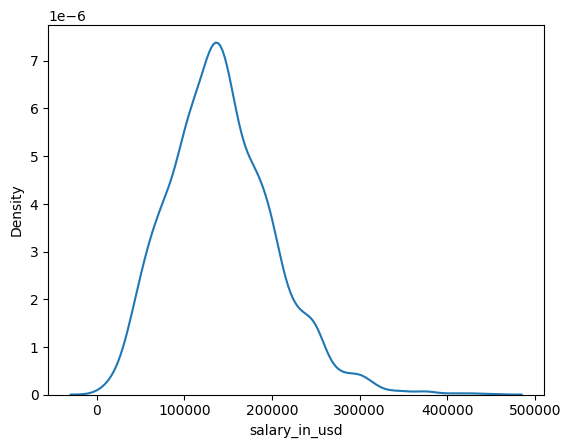

In [119]:
sns.kdeplot(df['salary_in_usd'])

In [120]:
import numpy as np

salaries = df['salary_in_usd']
log_salaries = np.log10(salaries)
labels = ['Low', 'Medium', 'High', 'Very High']
salary_categories = pd.cut(log_salaries, bins = 4, labels = labels)
print(salary_categories)

0            High
3       Very High
4            High
5       Very High
6            High
          ...    
3748       Medium
3749    Very High
3750    Very High
3751    Very High
3752         High
Name: salary_in_usd, Length: 3547, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


In [121]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder().fit(salary_categories)
print(le.classes_)

y = le.transform(salary_categories)
print(y)



['High' 'Low' 'Medium' 'Very High']
[0 3 0 ... 3 3 0]


In [122]:
y.shape

(3547,)

In [125]:
import numpy as np

col_select = df2.columns.drop(['salary_in_usd'])

cc = {
    'data': df2[col_select].to_numpy(),
    'target': y,
    'feature_name': col_select,
    'target_name': 'salary_in_usd',

}

cc

{'data': array([[2023,    3,  100, ...,    0,   10,    2],
        [2023,    3,  100, ...,    1,    4,    2],
        [2023,    3,  100, ...,    1,    4,    2],
        ...,
        [2020,    3,  100, ...,    1,   40,    2],
        [2021,    2,  100, ...,    1,   40,    2],
        [2020,    0,  100, ...,    1,   40,    2]]),
 'target': array([0, 3, 0, ..., 3, 3, 0]),
 'feature_name': Index(['work_year', 'experience_level', 'remote_ratio', 'company_size',
        'Country', 'Continent', 'country_code', 'main_job_title_category'],
       dtype='object'),
 'target_name': 'salary_in_usd'}

In [126]:
print(cc['feature_name'].shape)
print(cc['data'].shape)

(8,)
(3547, 8)


In [127]:
random_seed_val = 100
y_pred_train = {}
y_pred_test = {}
model_list = {}

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    cc["data"], cc["target"], test_size=0.3, random_state=random_seed_val
)

In [129]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=random_seed_val, solver="liblinear").fit(
    x_train, y_train
)
y_pred_train["LR"] = lr_clf.predict(x_train)
y_pred_test["LR"] = lr_clf.predict(x_test)
model_list["LR"] = lr_clf


from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=random_seed_val)
dt_clf.fit(x_train, y_train)

y_pred_train["DT"] = dt_clf.predict(x_train)
y_pred_test["DT"] = dt_clf.predict(x_test)
model_list["DT"] = dt_clf


from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion="entropy", random_state=random_seed_val)
rf_clf.fit(x_train, y_train)

y_pred_train["RF"] = rf_clf.predict(x_train)
y_pred_test["RF"] = rf_clf.predict(x_test)
model_list["RF"] = rf_clf







In [130]:
from sklearn.metrics import accuracy_score

algo_list = ["LR", "DT", "RF"]

results_train = {}
results_test = {}

for algo in algo_list:
    results_train[algo] = accuracy_score(y_train, y_pred_train[algo])
    results_test[algo] = accuracy_score(y_test, y_pred_test[algo])

In [131]:
print(results_train)
print(results_test)

{'LR': 0.5975020145044319, 'DT': 0.6857373086220789, 'RF': 0.6857373086220789}
{'LR': 0.6140845070422535, 'DT': 0.6525821596244131, 'RF': 0.6591549295774648}


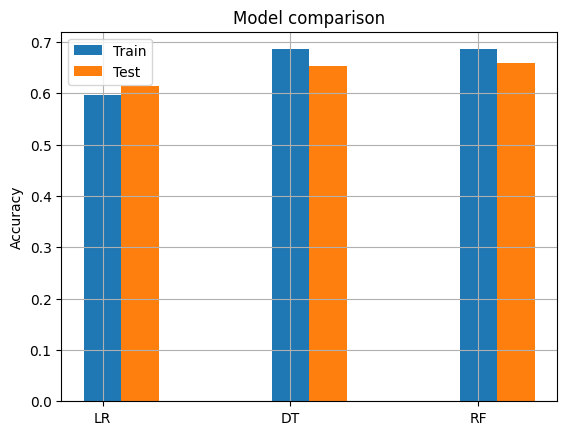

In [132]:
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
labels = algo_list
x = np.arange(len(labels))  # the label locations

ax.bar(x, results_train.values(), width, label="Train")
ax.bar(x + width, results_test.values(), width, label="Test")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_title("Model comparison")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.grid(None)
ax.legend()

## Comparison of all evaluation scores

In [134]:
# REGRESSION SCORES
# Create a DataFrame with the model names and performance metrics
model_metrics = pd.DataFrame({'Model': ['Random Forest Regression', 'Linear Regression'],
                              'R2 Score': [rfr_test_r2_tuned, lr_test_r2],
                              'MAE': [rfr_test_mae_tuned, lr_test_mae],
                              'RMSE': [rfr_test_rmse_tuned, lr_test_rmse]})

# Set the 'Model' column as the index
model_metrics = model_metrics.set_index('Model')

# Format the DataFrame to make it look nicer
model_metrics = model_metrics.style.format({'R2 Score': '{:.2f}',
                                            'MAE': '{:.2f}',
                                            'RMSE': '{:.2f}'})

# Display the DataFrame
display(model_metrics)

,R2 Score,MAE,RMSE
Model,,,
Random Forest Regression,0.32,37846.99,51883.46
Linear Regression,0.25,39550.80,54233.11


In [135]:
# Classification scores
# Create a DataFrame with the model names and test accuracy
model_metrics = pd.DataFrame({'Algorithm': algo_list,
                              'Test Accuracy': results_test.values()})

# Set the 'Algorithm' column as the index
model_metrics = model_metrics.set_index('Algorithm')

# Format the DataFrame to make it look nicer
model_metrics_formatted = model_metrics.style.format({'Test Accuracy': '{:.2f}'})

# Display the DataFrame
display(model_metrics_formatted)


,Test Accuracy
Algorithm,
LR,0.61
DT,0.65
RF,0.66
